In [132]:
# import libraries
import pandas as pd
import seaborn as sns

In [133]:
anime_df = pd.read_csv('anime.csv')
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [134]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [135]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


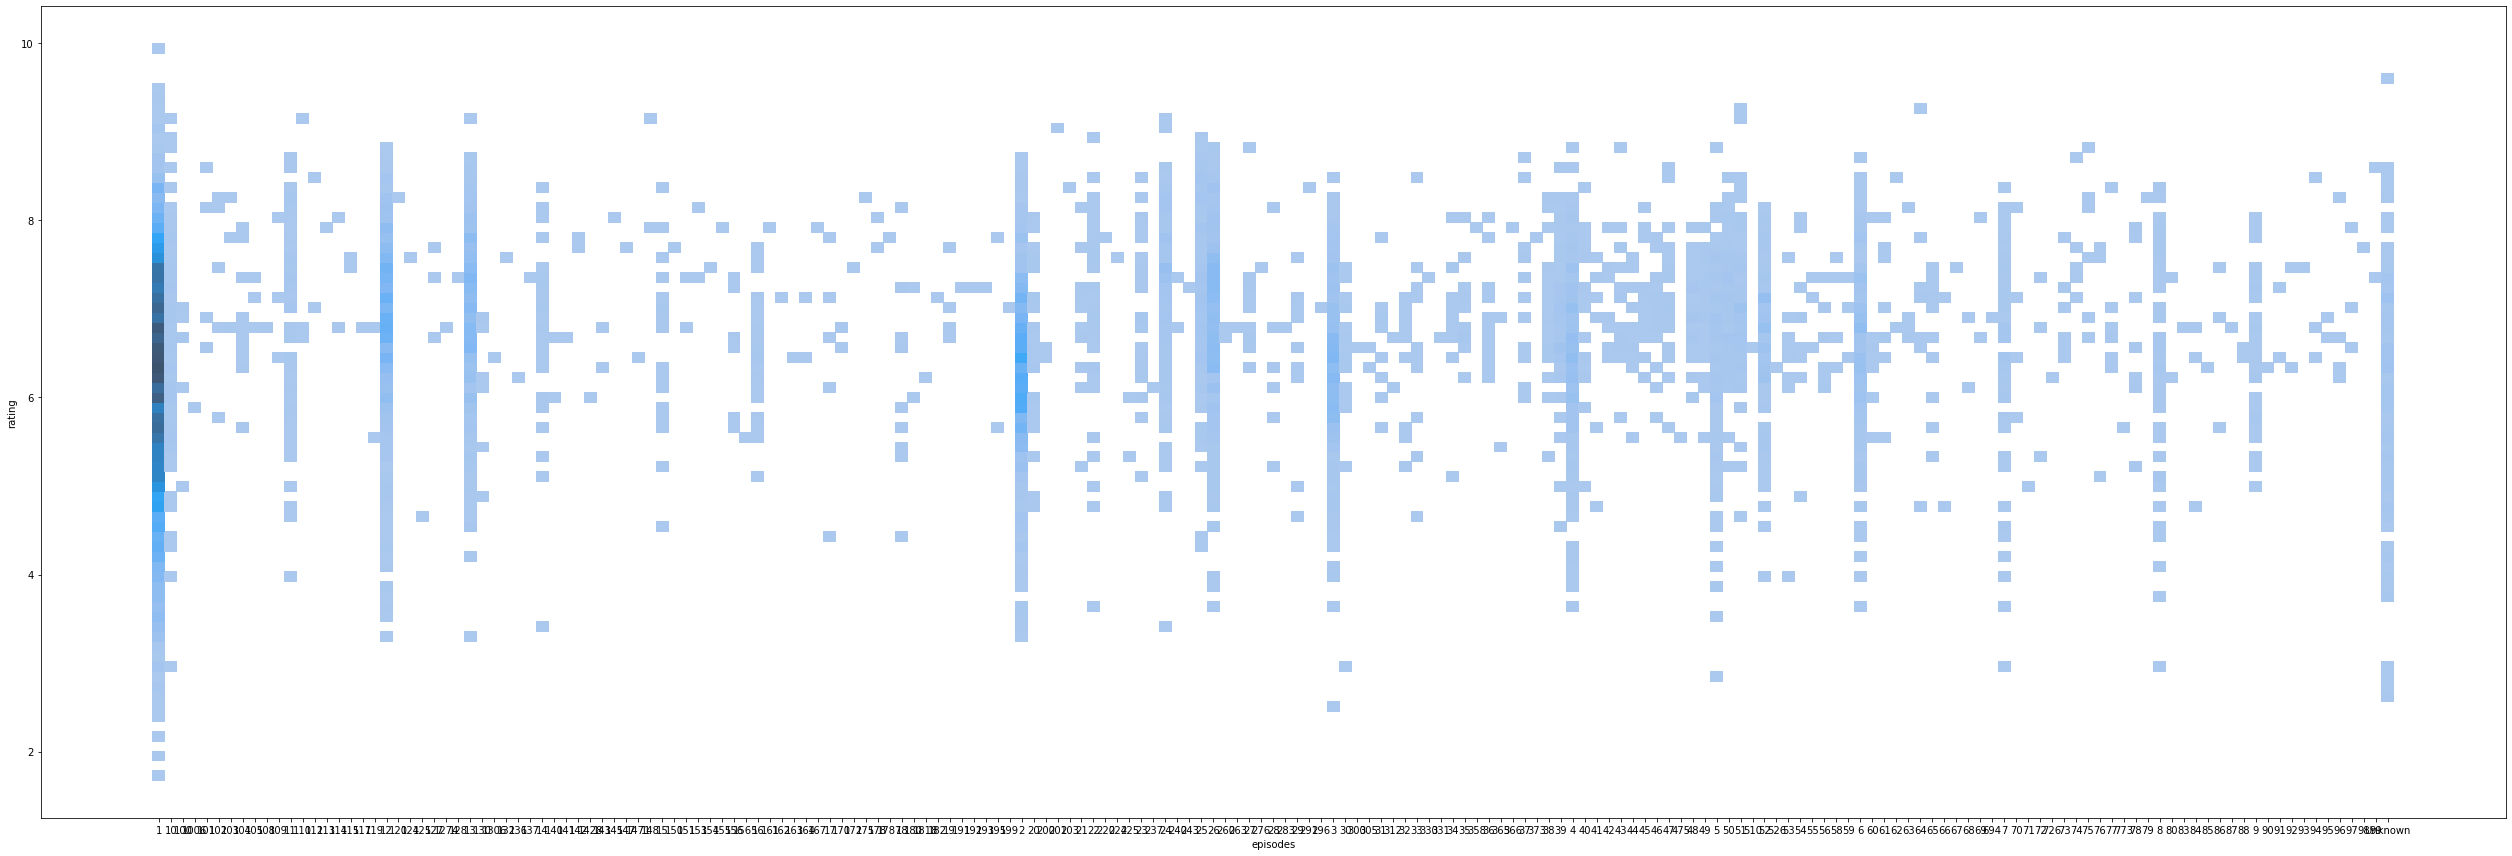

In [136]:
import matplotlib.pyplot as plt
sorted_df = anime_df.sort_values('episodes')
plt.figure(figsize=(35, 12))
sns.histplot(x='episodes', y='rating', data=sorted_df)
plt.tight_layout()
# there is no certain relation  between rating and episodes number but we can say that one episodes rated most

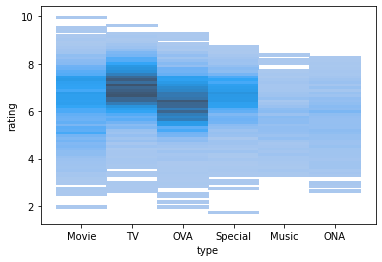

In [137]:
sns.histplot(x='type', y='rating', data=anime_df)
# the max rate belongs to Movie type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


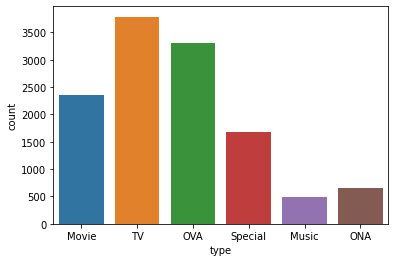

In [138]:
sns.countplot('type', data=anime_df)
# TV type has the greatest count 

"\nTV types are approximately rated between 5 and 9 \nwe can not say that there is certain corellation between rating and members but there can be positive relation on TV type\nwe clearly see that the one movie has the greatest rating but i think it's because of the members are not enough for the rating so we have to classify a range for members\n"

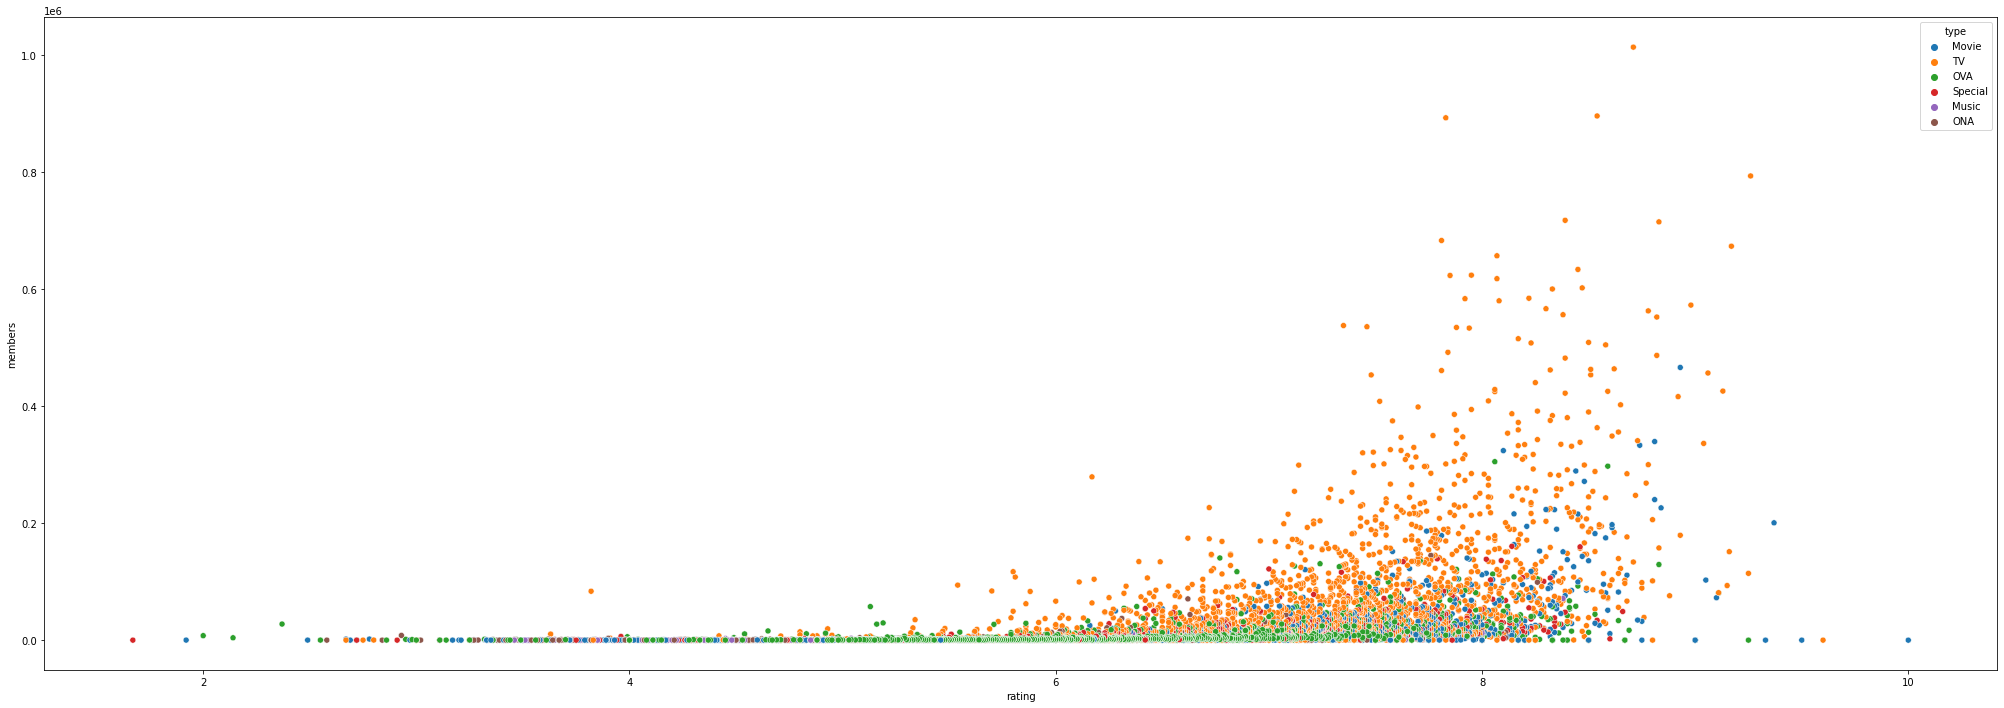

In [139]:
plt.figure(figsize=(35, 12))
sns.scatterplot(x='rating', y='members',hue='type', data=anime_df)
"""
TV types are approximately rated between 5 and 9 
we can not say that there is certain corellation between rating and members but there can be positive relation on TV type
we clearly see that the one movie has the greatest rating but i think it's because of the members are not enough for the rating so we have to classify a range for members
"""

In [140]:
# there can be some misleading ratings so I work on the animes that have at least 100 members 
anime_df = anime_df[anime_df['members']>=100]
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [141]:
# I wondered which anime has the most member count
anime_df['members'].idxmax()
anime_df.iloc[40]

anime_id                                                 1535
name                                               Death Note
genre       Mystery, Police, Psychological, Supernatural, ...
type                                                       TV
episodes                                                   37
rating                                                   8.71
members                                               1013917
Name: 40, dtype: object

In [142]:
anime_df.groupby('episodes').mean()

,anime_id,rating,members
episodes,,,
1,13586.235320,6.377913,8846.010736
10,16188.816327,6.663673,35273.663265
100,5569.666667,6.756667,2306.166667
1006,10241.000000,5.920000,153.000000
101,7091.750000,7.525000,23920.000000
...,...,...,...
96,4643.250000,6.882500,5911.250000
97,7223.000000,7.176667,46635.333333
98,2268.000000,7.670000,5652.000000


In [143]:
# let's look that if we can ignore the unknown episodes
anime_df[anime_df['episodes']=='Unknown'].count()
# there are pretty much Unknown values so I want to fill them with avg episode number

anime_id    285
name        285
genre       277
type        263
episodes    285
rating      140
members     285
dtype: int64

In [144]:
# there many and precious animes in unknown episodes so we can not just drop
anime_df[anime_df['episodes']=='Unknown']

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,Unknown,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [146]:
import numpy as np
anime_df['episodes'].mask(anime_df['episodes'] == "Unknown", 0, inplace=True)
anime_df[anime_df['episodes']=='Unknown'] # no Unknown value anymore

,anime_id,name,genre,type,episodes,rating,members


In [151]:
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'])
mean = round(anime_df['episodes'].mean())
mean

12

In [153]:
#I'm gonna replace the Unknown (now they are 0) with mean value of the episodes column
anime_df['episodes'].mask(anime_df['episodes'] == 0, mean, inplace=True)
anime_df[anime_df['episodes']==12] # we can see that missing values of episodes completed with mean

,anime_id,name,genre,type,episodes,rating,members
23,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458
36,11741,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller",TV,12,8.73,340973
49,31043,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural",TV,12,8.65,402381
62,32995,Yuri!!! on Ice,"Comedy, Sports",TV,12,8.61,103178
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,12,8.58,504862
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,12,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,12,NaN,392
12280,34312,Saimin Class,Hentai,OVA,12,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,12,NaN,195


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


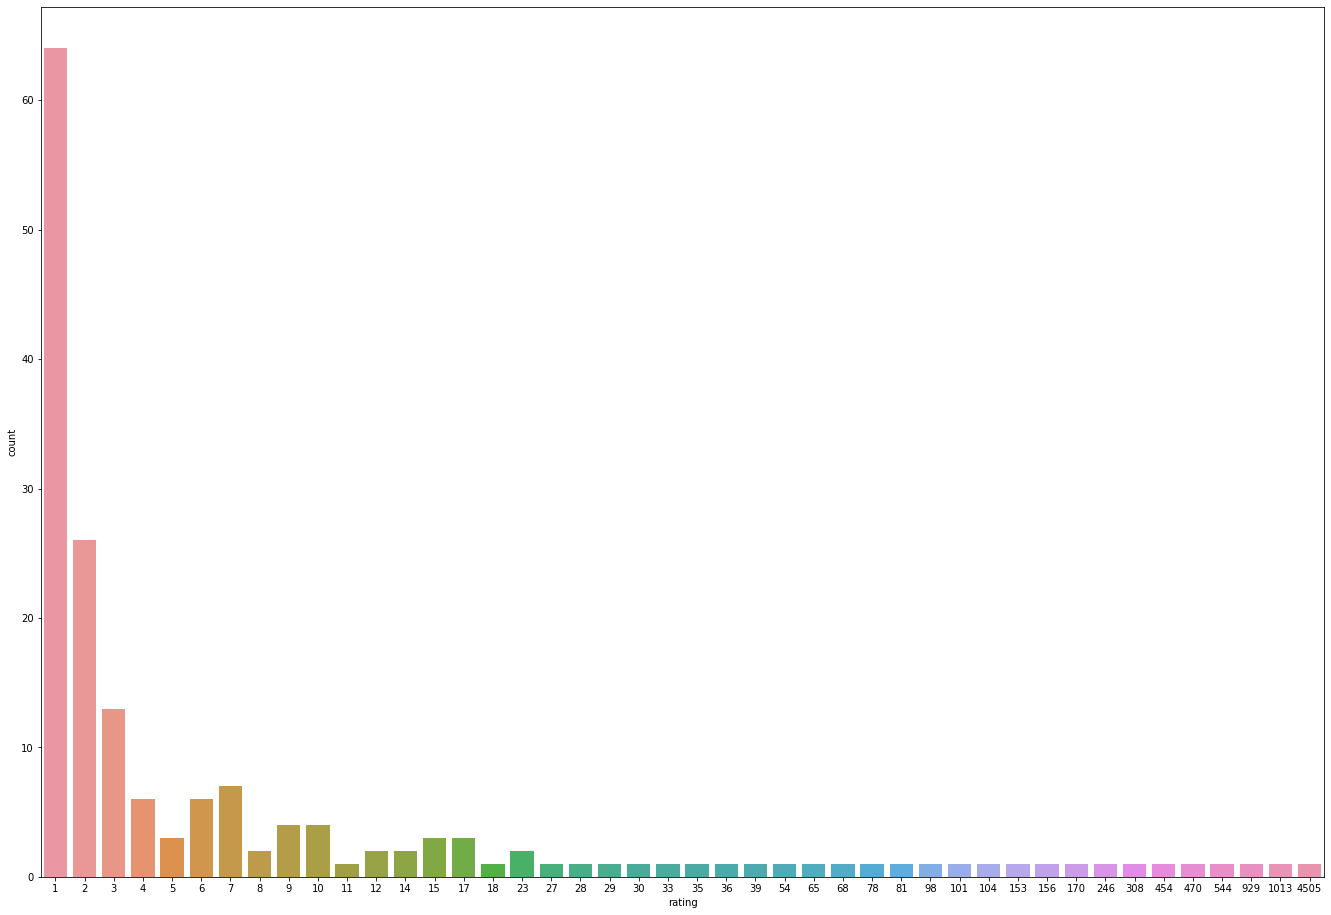

In [162]:
grouped_df = anime_df.groupby('episodes').count()['rating']
plt.figure(figsize=(23, 16))
sns.countplot(grouped_df)